In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import pandas as pd
from tqdm import tqdm
import pickle

In [3]:
weights_file = "LM_FF_Mar_28_2_2022_Speed_Stop_Vehicle_416_256.weights"
cfg_file = "LM_FF_America_Speed_Stop_vehicles_416_256.cfg"
class_file = "class.txt"
img_size=(416,256)

# weights_file = "TinyYolov3/Weight_files/yolov3-tiny-america_best.weights"
# cfg_file = "TinyYolov3/Cfg_files/yolov3-tiny-america.cfg"
# class_file="TinyYolov3/Class_files/america_classes.txt"
# img_size=(416,416)

scale=0.00392
fps=10.0
W,H=640, 360
Width,Height=640, 360

# vid_path=os.path.join('../../../datasets/lightmetrics_data/videos_dataset/HarshBraking',
# 'eventVideo_sensor_Harsh-Braking_trip_master_2022_03_15_00_27_24_887_A7F144D8F6A1255B7D44B5B861A28475AB24F23B_VgHgv_4_1647305450748_primary_2022_03_15_00_50_50_748.mp4')
net = cv2.dnn.readNet(weights_file,cfg_file)
with open(class_file, 'r') as f:
    america_class_names = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(america_class_names), 3))
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

def draw_bounding_box(img, cnames, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(cnames[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    cv2.putText(img, label, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return img

In [185]:
# cap = cv2.VideoCapture(vid_path)
# vid_out=cv2.VideoWriter("dataset/Braking_trip_master_2022_03_15_00_27_24_887_A7F144D8F6A1255B7D44B5B861A28475AB24F23B_VgHgv_4_1647305450748_primary_2022_03_15_00_50_50_748.mp4",cv2.VideoWriter_fourcc(*'mp4v'),fps,(W,H))
# while True:
#     ret,color_img=cap.read()
#     if not ret:
#         break
#     # image=color_img
#     image= cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
#     blob = cv2.dnn.blobFromImage(image, scale, img_size, (0,0,0), True, crop=False)
#     net.setInput(blob)
#     outs = net.forward(get_output_layers(net))
#     class_ids = []
#     confidences = []
#     boxes = []
#     conf_threshold = 0.3
#     nms_threshold = 0.4
#     count = 0
#     for out in outs:
#         for detection in out:
#             scores=detection[5:]
#             count += 1
#             class_id = np.argmax(scores)
#             confidence = scores[class_id]
#             if confidence > conf_threshold:
#                 center_x = int(detection[0] * Width)
#                 center_y = int(detection[1] * Height)
#                 w = int(detection[2] * Width)
#                 h = int(detection[3] * Height)
#                 x = center_x - w / 2
#                 y = center_y - h / 2
#                 class_ids.append(class_id)
#                 confidences.append(float(confidence))
#                 boxes.append([x, y, w, h])
#     indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
#     drawn_image = color_img

#     for i in indices:
#         number = 0
#         box = boxes[i]
#         x = max(int(box[0]),0)
#         y = max(int(box[1]),0)
#         w = int(box[2])
#         h = int(box[3])

#         if(class_ids[i] == 0 or class_ids[i] == 1 or class_ids[i] == 2):
#             drawn_image = draw_bounding_box(color_img, america_class_names, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
#     vid_out.write(drawn_image)
            
# cap.release()
# vid_out.release()

In [ ]:
folders=os.listdir('../../../datasets/lightmetrics_data/videos_dataset')
folders.remove('Untitled.ipynb')
vid_out=cv2.VideoWriter("dataset/videos/LM_FF_America.mp4",cv2.VideoWriter_fourcc(*'mp4v'),fps,(W,H))
for folder in folders:
    videos=os.listdir(os.path.join('../../../datasets/lightmetrics_data/videos_dataset',folder))
    for video_num,video in tqdm(enumerate(videos)):
        if 'mp4' in video:
            cap = cv2.VideoCapture(os.path.join('../../../datasets/lightmetrics_data/videos_dataset',folder,video))
            frame=0
            while True:
                ret,color_img=cap.read()
                frame+=1
                if not ret:
                    break
                # image=color_img   # Uncomment for tinyyolo, comment for LM_FF
                image= cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)  # comment for tinyyolo, Uncomment for LM_FF
                blob = cv2.dnn.blobFromImage(image, scale, img_size, (0,0,0), True, crop=False)
                net.setInput(blob)
                outs = net.forward(get_output_layers(net))
                class_ids = []
                confidences = []
                boxes = []
                conf_threshold = 0.3
                nms_threshold = 0.4
                count = 0
                for out in outs:
                    for detection in out:
                        scores=detection[5:]
                        count += 1
                        class_id = np.argmax(scores)
                        confidence = scores[class_id]
                        if confidence > conf_threshold:
                            center_x = int(detection[0] * Width)
                            center_y = int(detection[1] * Height)
                            w = int(detection[2] * Width)
                            h = int(detection[3] * Height)
                            x = center_x - w / 2
                            y = center_y - h / 2
                            class_ids.append(class_id)
                            confidences.append(float(confidence))
                            boxes.append([x, y, w, h])
                indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
                drawn_image = color_img

                for i in indices:
                    number = 0
                    box = boxes[i]
                    x = max(int(box[0]),0)
                    y = max(int(box[1]),0)
                    w = int(box[2])
                    h = int(box[3])

                    if(class_ids[i] == 0 or class_ids[i] == 1 or class_ids[i] == 2):
                        drawn_image = draw_bounding_box(color_img, america_class_names, class_ids[i], confidences[i],
                                                        round(x), round(y), round(x+w), round(y+h))
                cv2.putText(drawn_image,'{} video: {},frame: {}'.format(folder,video_num+1,frame),
                            (0,13),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.9,(0, 155, 155),1)
                vid_out.write(drawn_image)

            cap.release()
vid_out.release()

1773it [1:25:30,  2.78s/it]

In [205]:
weights_file1 = "TinyYolov3/Weight_files/yolov3-tiny-america_best.weights"
cfg_file1 = "TinyYolov3/Cfg_files/yolov3-tiny-america.cfg"
class_file1="TinyYolov3/Class_files/america_classes.txt"
img_size1=(416,416)

weights_file2 = "LM_FF_Mar_28_2_2022_Speed_Stop_Vehicle_416_256.weights"
cfg_file2 = "LM_FF_America_Speed_Stop_vehicles_416_256.cfg"
class_file2 = "class.txt"
img_size2=(416,256)
image1=cv2.imread('Image_S16_5.jpg')
image2=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

net1 = cv2.dnn.readNet(weights_file1,cfg_file1)
net2 = cv2.dnn.readNet(weights_file2,cfg_file2)
blob1 = cv2.dnn.blobFromImage(image1, scale, img_size1, (0,0,0), True, crop=False)
net1.setInput(blob1)
blob2 = cv2.dnn.blobFromImage(image2, scale, img_size2, (0,0,0), True, crop=False)
net2.setInput(blob2)

In [231]:
net2.forward(net2.getLayerNames()[-4]).shape

(1, 64, 16, 26)

## Embeddings and Inference

In [72]:
import torch, json
from mmcls.datasets import build_dataloader, build_dataset
from mmcls.models import build_classifier
import os, cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

In [313]:
file=torch.load('TinyYolov3/resnet50/resnet50_5x_224x224_weather_tag_bdd100k.pth')
model1 = torch.hub.load("pytorch/vision", "resnet50", weights=file['state_dict'])
model2=build_classifier(dict(
    type="ImageClassifier",
    backbone=dict(
        type="ResNet",
        depth=50,
        num_stages=4,
        out_indices=(3,),
        style="pytorch",
    ),
    neck=dict(type="GlobalAveragePooling"),
    head=dict(
        type="LinearClsHead",
        num_classes=7,
        in_channels=2048,
        loss=dict(type="CrossEntropyLoss", loss_weight=1.0),
    ),
))
model2.load_state_dict(file['state_dict'])
model2.eval()

In [86]:
Files=['hb.json','ss.json','tg.json']
gt=[]
for File in Files:
    with open(File,'r') as f:
        gt.extend(json.load(f))

'Sunny'

In [116]:
CLASSES=['rainy', 'snowy', 'clear', 'overcast', 'undefined', 'partly cloudy', 'foggy']
folders=os.listdir('../../../datasets/lightmetrics_data/videos_dataset')
folders.remove('Untitled.ipynb')
embedding=[]
lengt=len(gt)
final={'video':[],'embedding':[],'inference':[],'prediction':[],'gt':[]}
for folder in folders:
    videos=os.listdir(os.path.join('../../../datasets/lightmetrics_data/videos_dataset',folder))
    for video in tqdm(videos):
        if 'mp4' in video:
            embeddings,inference,pred_cls,gt_label=[],[],[],[]
            cap = cv2.VideoCapture(os.path.join('../../../datasets/lightmetrics_data/videos_dataset',folder,video))
            frame=0
            while True:
                ret,color_img=cap.read()
                frame+=10
                cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
                if not ret:
                    break
                color_img=np.array(cv2.resize(color_img,(224,224)),dtype=np.float32)
                out1=model1(torch.from_numpy(color_img).view(1,3,224,224))
                out2=model2.forward_test(torch.from_numpy(color_img).view(1,3,224,224))
                embeddings.append(out1[0].tolist())
                embedding.append(out1[0].tolist())
                inference.append(out2[0].tolist())
                pred_cls.append(CLASSES[np.argmax(out2)])
                for i in range(lengt):
                    if gt[i]['inputs'][0]==video:
                        gt_label.append(gt[i]['attributes']['weather'])
                        break
            cap.release()
            final['video'].append(video)
            final['embedding'].append(embeddings)
            final['inference'].append(inference)
            final['prediction'].append(pred_cls)
            final['gt'].append(gt_label)
            

100% 2092/2092 [1:02:47<00:00,  1.80s/it]
100% 1463/1463 [47:26<00:00,  1.95s/it]
100% 4602/4602 [2:40:02<00:00,  2.09s/it]  
100% 1/1 [00:00<00:00, 5974.79it/s]
100% 215/215 [00:00<00:00, 866258.75it/s]


In [119]:
len(final['video']),2092+1463+4602+1+215

(8157, 8373)

In [131]:
df_light=pd.DataFrame(final)#.to_csv('lightmetrics.csv',index=False)

In [124]:
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [125]:
embed_dimesion=2
reducer = UMAP(n_components=embed_dimesion, random_state=42)
embed1 = reducer.fit_transform(StandardScaler().fit_transform(embedding))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


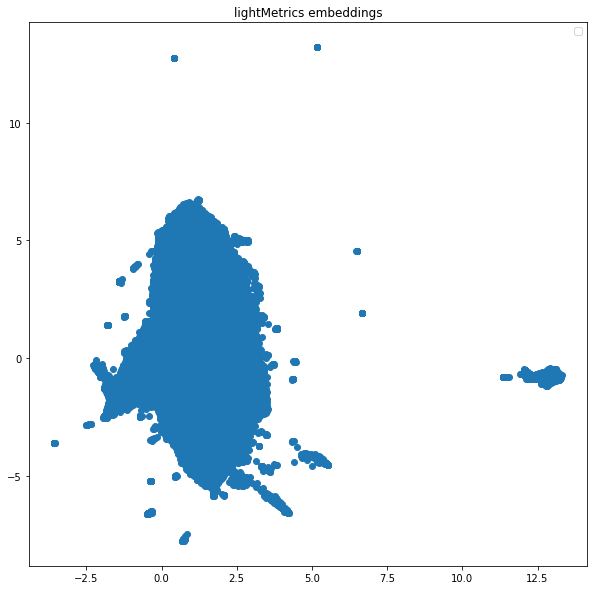

In [129]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title("lightMetrics embeddings")
plt.scatter(embed1[:,0],embed1[:,1])  #,c=labels
plt.legend()
plt.show()

In [130]:
len(embedding),len(embed1)

(94421, 94421)

In [198]:
# frame=10
final_result={'video_name':[],'folder_name':[],'predicted_class':[]}
HarshBraking=os.listdir(os.path.join('../../../datasets/lightmetrics_data/videos_dataset','HarshBraking'))
TailGating=os.listdir(os.path.join('../../../datasets/lightmetrics_data/videos_dataset','TailGating'))
StopSign=os.listdir(os.path.join('../../../datasets/lightmetrics_data/videos_dataset','StopSign'))
SpeedSign=os.listdir(os.path.join('../../../datasets/lightmetrics_data/videos_dataset','SpeedSign'))

for i in range(1000):
    final_result[str(i)]=[]
# for folder in folders:
#     videos=os.listdir(os.path.join('../../../datasets/lightmetrics_data/videos_dataset',folder))
#     for video in tqdm(videos):
#         if 'mp4' in video:
#             cap = cv2.VideoCapture(os.path.join('../../../datasets/lightmetrics_data/videos_dataset',folder,video)) 
#             while True:
#                 cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
#                 ret,image=cap.read()
#                 if not ret:
#                     frame-=1
#                     continue
#                     if frame<0:
#                         break
#                 else:
#                     frame=10
#                     break
#             image=np.array(cv2.resize(image,(224,224)),dtype=np.float32)
#             out1=model1(torch.from_numpy(image).view(1,3,224,224))
#             out2=model2.forward_test(torch.from_numpy(image).view(1,3,224,224))
#             final_result['video_name'].append(video)
#             final_result['folder_name'].append(folder)
#             final_result['predicted_class'].append(CLASSES[np.argmax(out2)])
#             for i in range(1000):
#                 final_result[str(i)].append(out1[0][i].item())
#             cap.release()

for i,video in tqdm(enumerate(final['video'])):
    final_result['video_name'].append(video)    
    if video in HarshBraking:
        final_result['folder_name'].append('HarshBraking')
    elif video in TailGating:
        final_result['folder_name'].append('TailGating')
    elif video in StopSign:
        final_result['folder_name'].append('StopSign')
    elif video in SpeedSign:
        final_result['folder_name'].append('SpeedSign')
        
    if len(final['embedding'][i])>1:
        final_result['predicted_class'].append(final['prediction'][i][1])
        emb=final['embedding'][i][1]
        for j in range(1000):
            final_result[str(j)].append(emb[j])
    else:
        final_result['predicted_class'].append(final['prediction'][i][0])
        emb=final['embedding'][i][0]
        for j in range(1000):
            final_result[str(j)].append(emb[j])

8157it [00:04, 2030.67it/s]


In [247]:
from pytube import YouTube
# from moviepy.editor import *

In [249]:
link="https://www.youtube.com/watch?v=wlgClFPZg6w"
YouTube(link).streams.filter(only_video=True,file_extension='mp4').first().download()

'/project/a100/rahul/Yolo/Yolo/Foggy weather.mp4'

In [340]:
cap=cv2.VideoCapture("foggy.mp4")
frame=250
img_size=(640,640)
pred_cls=[]
while True:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    ret,image=cap.read()
    if not ret:
        break
        
    frame+=100
    image=np.array(cv2.resize(image,img_size),dtype=np.float32)
    out2=model2.forward_test(torch.from_numpy(image).view(1,3,img_size[0],img_size[1]))
    pred_cls.append(CLASSES[np.argmax(out2)])
    print(out2)
    
cap.release()

[array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)]
[array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)]


In [2]:
# weights_file1 = "LM_FF_Mar_28_2_2022_Speed_Stop_Vehicle_416_256.weights"
# cfg_file1 = "LM_FF_America_Speed_Stop_vehicles_416_256.cfg"
# class_file1 = "class.txt"
img_size1=(416,256)

weights_file2 = "TinyYolov3/Weight_files/yolov3-tiny-america_best.weights"
cfg_file2 = "TinyYolov3/Cfg_files/yolov3-tiny-america.cfg"
class_file2="TinyYolov3/Class_files/america_classes.txt"
img_size2=(416,416)

scale=0.00392
fps=10.0
W,H=640, 360
Width,Height=640, 360
classes = ['USSpeedSign', 'StopSign', 'Vehicle']

with open('../../false_pos.pickle' ,'rb') as f:
    false_pos = pickle.load(f)

# with open('img_idx.pickle', 'rb') as f:
#   img_idx = pickle.load(f)

# img, idx = img_idx['imname']

# fp_idx = np.load('../../fp_idx.npy')

# images_a = visual['images']

im_pic = false_pos['images']
idxs, imname = false_pos['idxs'], false_pos['imname']
# net1 = cv2.dnn.readNet(weights_file1,cfg_file1)
net1 = cv2.dnn.readNet(weights_file2,cfg_file2)
with open(class_file2, 'r') as f:
    america_class_names1 = [line.strip() for line in f.readlines()]

# with open(class_file1, 'r') as f:
#     america_class_names1 = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(america_class_names2), 3))
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

def draw_bounding_box(img, cnames, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(cnames[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    cv2.putText(img, label, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return img

In [11]:
vid_out=cv2.VideoWriter("false_pos.mp4",cv2.VideoWriter_fourcc(*'mp4v'),1,(W,H))
for img_name in tqdm(im_pic.keys()):
    image = np.array(im_pic[img_name], dtype=np.uint8)
    gray_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blob1 = cv2.dnn.blobFromImage(gray_image, scale, img_size1, (0,0,0), True, crop=False)
    blob2 = cv2.dnn.blobFromImage(image, scale, img_size2, (0,0,0), True, crop=False)
    net1.setInput(blob1)
    net2.setInput(blob2)
    outs1 = net1.forward(get_output_layers(net1))
    outs2 = net2.forward(get_output_layers(net2))
    class_ids1 = []
    confidences1 = []
    boxes1 = []
    conf_threshold = 0.3
    nms_threshold = 0.4
    count1 = 0
    for out1 in outs1:
        for detection1 in out1:
            scores1=detection1[5:]
            count1 += 1
            class_id1 = np.argmax(scores1)
            confidence1 = scores1[class_id1]
            if confidence1 > conf_threshold:
                center_x = int(detection1[0] * Width)
                center_y = int(detection1[1] * Height)
                w = int(detection1[2] * Width)
                h = int(detection1[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids1.append(class_id1)
                confidences1.append(float(confidence1))
                boxes1.append([x, y, w, h])
    indices1 = cv2.dnn.NMSBoxes(boxes1, confidences1, conf_threshold, nms_threshold)
    for i in indices1:
        number = 0
        box = boxes1[i]
        x = max(int(box[0]),0)
        y = max(int(box[1]),0)
        w = int(box[2])
        h = int(box[3])
        cv2.rectangle(image, (x, y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(image, america_class_names1[class_ids1[i]]+' LMFF,'+ str("%.2f"%confidences1[i]), (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)


    class_ids2 = []
    confidences2 = []
    boxes2 = []
    count2 = 0
    for out2 in outs2:
        for detection2 in out2:
            scores2=detection2[5:]
            count2 += 1
            class_id2 = np.argmax(scores2)
            confidence2 = scores2[class_id2]
            if confidence2 > conf_threshold:
                center_x = int(detection2[0] * Width)
                center_y = int(detection2[1] * Height)
                w = int(detection2[2] * Width)
                h = int(detection2[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids2.append(class_id2)
                confidences2.append(float(confidence2))
                boxes2.append([x, y, w, h])
    indices2 = cv2.dnn.NMSBoxes(boxes2, confidences2, conf_threshold, nms_threshold)
    for i in indices2:
        number = 0
        box = boxes2[i]
        x = max(int(box[0]),0)
        y = max(int(box[1]),0)
        w = int(box[2])
        h = int(box[3])
        cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(image, america_class_names2[class_ids2[i]]+' AM,'+ str("%.2f"%confidences2[i]), (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    cv2.putText(image, str(imname.index(img_name)), (0,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    vid_out.write(image)
vid_out.release()

100%|██████████| 62/62 [00:33<00:00,  1.84it/s]


In [4]:
path='roi_lmff1'
if not os.path.exists(path):
    os.mkdir(path)
img_idx={'crop_name':[], 'imname': [], 'label': [], 'conf': [], 'bbox': []}
for subdir, dirs, files in os.walk('lightmetrics_pic'):
    for num,file in enumerate(files):
        if '.jpg' in file:
            image = cv2.imread(os.path.join(subdir, file))
            gray_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            blob = cv2.dnn.blobFromImage(gray_image, scale, img_size, (0,0,0), True, crop=False)
            net.setInput(blob)
            outs1 = net.forward(get_output_layers(net))
            class_ids1 = []
            confidences1 = []
            boxes1 = []
            conf_threshold = 0.3
            nms_threshold = 0.4
            count1 = 0
            for out1 in outs1:
                for detection1 in out1:
                    scores1=detection1[5:]
                    count1 += 1
                    class_id1 = np.argmax(scores1)
                    confidence1 = scores1[class_id1]
                    if confidence1 > conf_threshold:
                        center_x = int(detection1[0] * Width)
                        center_y = int(detection1[1] * Height)
                        w = int(detection1[2] * Width)
                        h = int(detection1[3] * Height)
                        x = center_x - w / 2
                        y = center_y - h / 2
                        class_ids1.append(class_id1)
                        confidences1.append(float(confidence1))
                        boxes1.append([x, y, w, h])
            indices1 = cv2.dnn.NMSBoxes(boxes1, confidences1, conf_threshold, nms_threshold)
            for i in indices1:
                number = 0
                box = boxes1[i]
                x = max(int(box[0]),0)
                y = max(int(box[1]),0)
                w = int(box[2])
                h = int(box[3])
                label = america_class_names[class_ids1[i]]
                dst = os.path.join(path, label)
                if not os.path.exists(dst):
                    os.mkdir(dst)
                crop_name = file.split('.')[0]+'____10_'+label+'_'+str(i)+'.jpg'
                cv2.imwrite(os.path.join(dst,crop_name), image[y:y+h, x:x+w]) # num

                img_idx['imname'].append(file)
                img_idx['crop_name'].append(crop_name)
                img_idx['label'].append(label)
                img_idx['conf'].append(confidences1[i])
                img_idx['bbox'].append([x,y,w,h])

In [5]:
img_idx['imname'][:3]

['eventVideo_stop_sign_trip_master_2022_03_07_18_42_30_841_DF4B19E0366CBFF948266CD981333D6A872D682D_4l8fy_5_2022_03_07_19_53_43_511_primary.jpg',
 'eventVideo_stop_sign_trip_master_2022_05_30_17_13_38_504_2DFC1BCEF31DF0D454A86B68D9CC478B5AE59A37_VvYC4_6_2022_05_30_18_12_00_167_primary.jpg',
 'eventVideo_stop_sign_trip_master_2022_05_30_17_13_38_504_2DFC1BCEF31DF0D454A86B68D9CC478B5AE59A37_VvYC4_6_2022_05_30_18_12_00_167_primary.jpg']

In [6]:
with open('light_met_crop_lmff1.pickle', 'wb') as f:
    pickle.dump(img_idx, f)

In [1]:
import os, cv2, pickle, shutil

In [4]:
with open('../../lmff1.pickle' ,'rb') as f:
    lmff = pickle.load(f)

clas_a, images_a, embed1_a, metadata_a, color_a, clss_a = lmff['clas'], lmff['images'], lmff['embeddings'], lmff['metadata'], lmff['colors'], lmff['cls']

In [18]:
for i in range(len(clss_a)):
    if metadata_a[i] == 'lmff' and clss_a[i] == 'StopSign' and embed1_a[i][0]>5:
        shutil.copy(os.path.join('roi_lmff/StopSign',clas_a[i]+'.jpg'),os.path.join('false_positives/lmff/StopSign', clas_a[i]+'.jpg'))
        idx = clas_a[i].split('_')[-1]
        for subdir, dirs, files in os.walk('roi_america'):
            for file in files:
                if '.jpg' in file:
                    if idx == file.split('.')[0].split('_')[-1]:
                        src = os.path.join(subdir, file)
                        ds = os.path.join('false_positives/america', subdir.split('/')[-1])
                        if not os.path.exists(ds):
                            os.mkdir(ds)
                        dst = os.path.join(ds, file)
                        shutil.copy(src, dst)


In [17]:
clas_a[0].split('_')[-1]

'17'

## Metapix

In [10]:
import os, cv2, pickle
import numpy as np
from tqdm import tqdm
import pandas as pd
import shutil

In [2]:
df = pd.read_csv('../../consolidated.csv')
set(df['label'])

{'black',
 'blue',
 'brown',
 'green',
 'grey',
 'no',
 'orange',
 'purple',
 'red',
 'silver',
 'white'}

In [9]:
df['label'][90] in colors

'black'

In [37]:
path = 'metapix'
out_path = 'yolo_crop_metamix'
for subdir, dirs, files in os.walk(path):
    for file in files:
        if '.jpg' in file:
            image = cv2.imread(os.path.join(subdir, file))
            Height, Width = image.shape[:2]
            blob = cv2.dnn.blobFromImage(image, scale, img_size, (0,0,0), True, crop=False)
            net.setInput(blob)
            outs = net.forward(get_output_layers(net))
            max_conf = -1
            for out in outs:
                for detection in out:
                    scores=detection[5:]
                    class_id = np.argmax(scores)
                    confidence = scores[class_id]
                    if confidence > max_conf:
                        center_x = int(detection[0] * Width)
                        center_y = int(detection[1] * Height)
                        w = int(detection[2] * Width)
                        h = int(detection[3] * Height)
                        x = int(center_x - w / 2)
                        y = int(center_y - h / 2)
                        max_conf = confidence
            if not os.path.exists(os.path.join(out_path, subdir.split('/')[-2], subdir.split('/')[-1])):
                os.mkdir(os.path.join(out_path, subdir.split('/')[-2], subdir.split('/')[-1]))
            crop_img = image[y:y+h, x:x+w]
            if crop_img.shape[0]>0 and crop_img.shape[1]>0:
                cv2.imwrite(os.path.join(out_path, subdir.split('/')[-2], subdir.split('/')[-1], file), crop_img)

: 

In [19]:
with open('../../metamix.pickle', 'wb') as f:
    pickle.dump({'rgb': rgb, 'imname': imname, 'images': images, 'lbl': lbl, 'match': match}, f)

In [35]:
image[y:y+h, x:x+w], max_conf, x,y,w,h,image.shape

(array([], shape=(13, 0, 3), dtype=uint8), 0.0, -2, 0, 27, 13, (142, 244, 3))

In [36]:
len(image[y:y+h, x:x+w])

13

In [2]:
df = pd.read_csv('../../consolidated.csv')
label, match = df['label'], df['match']
label = label.replace(['no'], ['pink'])

In [13]:
np.unique(np.array(df['label']), return_counts=True)

(array(['black', 'blue', 'brown', 'green', 'grey', 'no', 'orange',
        'purple', 'red', 'silver', 'white'], dtype=object),
 array([203,  58,   2,  13,  80, 185,   3,   3,  49, 184, 205]))

In [1]:
import numpy as np
missing_image = np.load('../../missing_image.npy')

In [3]:
missing_image[-12:]

array(['0d682aa8-818e-436d-8cda-eb7a95f60dec.jpg',
       '0dd19618-7a6d-435c-a921-cf24c83bc744.jpg',
       '0a334e8f-080d-4109-a4d7-83e4c61e3ad1.jpg',
       '0aef6170-9c48-4376-adc0-d8dbea7586b8.jpg',
       '00a3af7c-3214-4665-a2df-a05600c72029.jpg',
       '0c074cef-13f9-4c55-b5a5-5f6c53958f76.jpg',
       '0b501543-567e-456d-b883-31ca5a2bd271.jpg',
       '0d7e2e28-e87d-4584-b411-fd6dcc74cbcb.jpg',
       '0ae0df2b-e98a-49fd-9241-a88609146c19.jpg',
       '0a3461be-7d39-4a1d-ab18-a4e39f3ee88b.jpg',
       '0c190cec-53ac-415e-9dbf-30293f85b913.jpg',
       '0ac87efe-bfb1-41fd-9768-7c37ae08a149.jpg'], dtype='<U40')